In [1]:
import requests
import datetime
from datetime import datetime
import numpy as np
import pandas as pd
import os
import sys
import json

import seaborn as sns
sns.set()
from matplotlib import pyplot as plt

#add the access token you got from NOAA
Token = 'UvarbdVPGFmtJyCDvHXbvevsqdyygTtK'

#Long Beach Airport station
station_id = 'GHCND:USW00094847'

In [12]:
#initialize lists to store data
dates_temp = []
dates_prcp = []
temps = []
minT = []
maxT = []
prcp = []

#for each year from 2015-2019 ...
for year in range(2015, 2016):
    year = str(year)
    print('working on year '+year)
    
    #make the api call
    r = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TAVG&datatypeid=TMAX&limit=1000&stationid='+station_id+'&startdate='+year+'-01-01&enddate='+year+'-12-31', headers={'token':Token})
    r2 = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TMIN&datatypeid=PRCP&limit=1000&stationid='+station_id+'&startdate='+year+'-01-01&enddate='+year+'-12-31', headers={'token':Token})

    #load the api response as a json
    d = json.loads(r.text)
    d2 = json.loads(r2.text)

    #get all items in the response which are average temperature readings
    avg_temps = [item for item in d['results'] if item['datatype']=='TAVG']
    min_temps = [item for item in d2['results'] if item['datatype']=='TMIN']
    max_temps = [item for item in d['results'] if item['datatype']=='TMAX']
    precp = [item for item in d2['results'] if item['datatype']=='PRCP']

    dates_temp += [item['date'] for item in avg_temps]
    #get the actual average temperature from all average temperature readings
    temps += [item['value'] for item in avg_temps]
    minT += [item['value'] for item in min_temps]
    maxT += [item['value'] for item in max_temps]
    prcp += [item['value'] for item in precp]

working on year 2015


In [21]:
#initialize dataframe
df_temp = pd.DataFrame()

#populate date and average temperature fields (cast string date to datetime and convert temperature from tenths of Celsius to Fahrenheit)
df_temp['date'] = [datetime.strptime(d, "%Y-%m-%dT%H:%M:%S") for d in dates_temp]
df_temp['avgTemp'] = [float(v)/10.0*1.8 + 32 for v in temps]
df_temp['minTemp'] = [float(v)/10.0*1.8 + 32 for v in minT]
df_temp['maxTemp'] = [float(v)/10.0*1.8 + 32 for v in maxT]
# Convert mm/day to inch/day
df_temp['prcp'] = [float(v)/25.54 for v in prcp]

In [22]:
df_temp.head()

,date,avgTemp,minTemp,maxTemp,prcp
0,2015-01-01,21.38,17.24,31.10,0.000000
1,2015-01-02,30.20,26.24,35.96,0.000000
2,2015-01-03,30.74,27.14,35.06,5.168363
3,2015-01-04,34.52,19.22,35.96,1.174628
4,2015-01-05,14.18,8.24,19.22,0.000000


In [23]:
df_temp.describe()

,avgTemp,minTemp,maxTemp,prcp
count,365.000000,365.000000,365.000000,365.000000
mean,50.886192,41.879781,60.073096,0.827174
std,20.156909,19.797708,21.324091,2.049675
min,-0.760000,-12.820000,7.160000,0.000000
25%,37.220000,29.120000,44.060000,0.000000
50%,53.240000,44.960000,62.960000,0.000000
75%,68.720000,59.000000,78.080000,0.391543
max,80.060000,71.960000,91.940000,13.821457


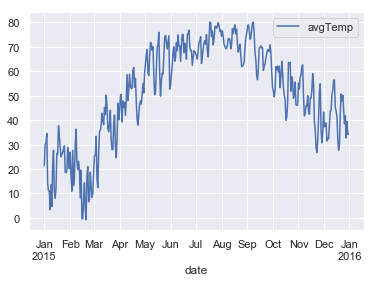

In [16]:
df_temp.plot(kind='line',x='date',y='avgTemp')

Reference:
https://towardsdatascience.com/getting-weather-data-in-3-easy-steps-8dc10cc5c859

In [24]:
df_temp.to_csv('Detroit_weather.csv')